<a href="https://colab.research.google.com/github/victorsa42/Analise_de_dados_com_Python-/blob/main/grafico_DESCONHECIDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

links para entender melhor:
* https://www.youtube.com/watch?v=t1d0gZ99G_Y
* https://www.youtube.com/watch?v=tnhjAziFT-Q
* https://matplotlib.org/stable/gallery/index.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html




In [ ]:
# importar modulos
import matplotlib.pyplot as plt  #modulo grafico
import numpy as np  #modulo matematico
import pandas as pd #modulo para analise de dados
from scipy.optimize import curve_fit #biblioteca cientifica responsavel por fitar uma  curva 

In [ ]:

# importar google drive e autenticação
from google.colab import drive,auth 
drive.mount('/content/gdrive', force_remount = True )

# importar google planilhas (sheet)
from google.colab import auth
auth.authenticate_user()
import gspread  # modulo do google sheet
from oauth2client.client import GoogleCredentials  #credenciais do google

## autenticação do modulo gspread
gc = gspread.authorize(GoogleCredentials.get_application_default())

Mounted at /content/gdrive


In [ ]:
# abrir o arquivo do sheet pelo nome
wb = gc.open('esfera')
### abrir pelo link
# wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1y8Yl6hQ9dwVGj_ouwqjKYWyssjSNir0b2EFQCVLHxh0/edit#gid=0')

sheet1 = wb.worksheet('Página1')
#sheet1.get_all_values()  ###pega todos os valores 
dados = sheet1.get_all_records()  ###pega todos os valores sendo a primeira linha o titulo

df = pd.DataFrame(dados)
df

,T,A,erro T,erro A
0,0.13,10.0,0.05,1
1,0.30,40.0,0.05,1
2,0.37,70.0,0.05,1
3,0.43,90.0,0.05,1
4,0.50,110.0,0.05,1
5,0.53,130.0,0.05,1
6,0.58,150.0,0.05,1
7,0.60,170.0,0.05,1


In [ ]:
# equção a ser usada
def func(x, g, v, s):
    return 0.5*g*x**2  + v*x + s

In [ ]:
#x = np.array([1, 2, 2.5, 6, 7.8, 9.6])
# x= np.linspace(1,7,50)

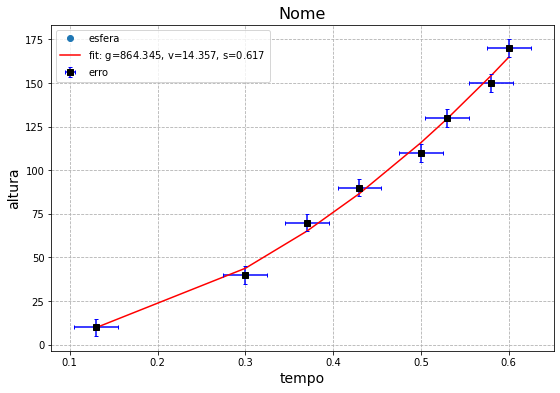

In [ ]:
#criar uma figura que sera o grafico
fig, ax = plt.subplots(figsize = (9,6))
nomefig = 'Grafico1.png'

#ajuste
popt, pcov = curve_fit(func, x, y)
popt

#valores dos eixos referentes as colunas da tabela 
x = np.array(df['T'])
y = np.array(df['A'])
c = np.array(df['erro T'])/2
d = np.array(df['erro A'])*5


# plotar o grafico
ax.plot(x ,y , marker = 'o', label="esfera", ls = '', lw = '1')

# plot do ajuste
plt.plot(x, func(x, *popt), 'r-', label='fit: g=$%5.3f$, v=%5.3f, s=%5.3f' % tuple(popt))

#configurações do grafico
tamanhofont=14
ax.errorbar(x,y, xerr=c, yerr=d, fmt="ks", color="b", label='erro', capsize=2 ,ecolor='b') #barra de erro
ax.set_title('Nome', fontsize = 16) #titulo
ax.set_xlabel('tempo', fontsize = tamanhofont) #nome do eixo x
ax.set_ylabel('altura', fontsize = tamanhofont) #nome do eixo y
ax.grid(ls= '--') #grid no grafico
ax.legend(fontsize = 10) #legenda do grafico

## salvar figura
fig.savefig(nomefig)
plt.show()